### Experiencia 2
### EL5206-2 Laboratorio de Inteligencia Computacional y Robótica
**Profesor:** Claudio Pérez.<br>
**Auxiliar:** Juan Pérez<br>
**Estudiantes:** Elisa Parga, Simón Repolt

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import PIL
from google.colab.patches import cv2_imshow
import math
from skimage.util import view_as_windows
import IPython

### Parte #1: LBP

Se implementa el algoritmo de análisis de textura LBP usando una matriz de 3x3 y posteriormente se aplica LBP a todas las imágenes de ojos disponibles.

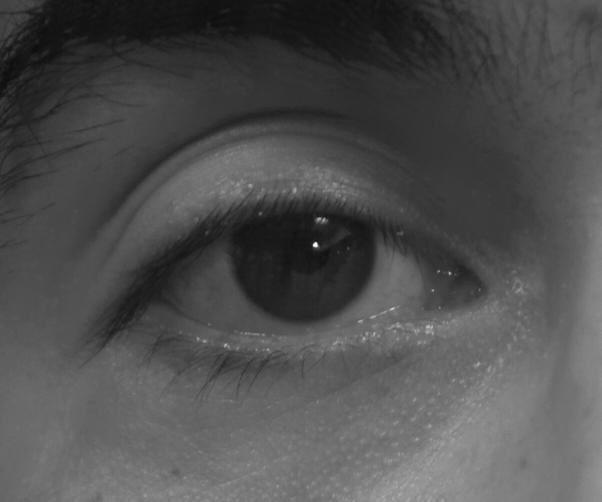

[[ 66  66  66 ...  88  87  87]
 [ 66  66  66 ...  88  88  88]
 [ 66  66  66 ...  88  88  88]
 ...
 [101 101 100 ... 142 142 142]
 [101 101 100 ... 142 142 142]
 [101 101 100 ... 142 143 143]]


In [2]:
image = cv2.imread("/content/bdd/I1_gal.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

print(image)

In [3]:
def lbp_matrix(matrix): # recibe una matriz de 3x3 y retorna su LBP
  center = matrix[1][1]
  value = ""
  for i in range(3):
    for j in range(3):
      if matrix[i][j] >= center:
        value += "1"
      else:
        value += "0"
  return int(value, 2)

def lbp_image(imagen): #no tiene nada de eficiente, pero funciona
    xsize, ysize = imagen.shape
    lbp_image = np.zeros((xsize-2, ysize-2))
    for i in range(1,xsize-1):
        for j in range(1,ysize-1):
            block = imagen[i-1:i+2,j-1:j+2]
            value = lbp_matrix(block)
            lbp_image[i-1][j-1] = value
    return lbp_image


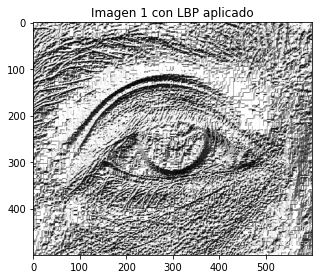

'esto es un testing de que funciona lo que se hizo'

In [4]:
newimg= lbp_image(cv2.imread("/content/bdd/I1_gal.jpg",cv2.IMREAD_GRAYSCALE))
plt.figure(figsize=(5,5))
    
plt.imshow(newimg, cmap="gray")
plt.title('Imagen 1 con LBP aplicado')
plt.show()

"esto es un testing de que funciona lo que se hizo"


In [5]:
lista_img = []
for i in range(1,11):
    name = f"I{i}_gal.jpg".format(i)
    lista_img.append(name)

print(lista_img)

['I1_gal.jpg', 'I2_gal.jpg', 'I3_gal.jpg', 'I4_gal.jpg', 'I5_gal.jpg', 'I6_gal.jpg', 'I7_gal.jpg', 'I8_gal.jpg', 'I9_gal.jpg', 'I10_gal.jpg']


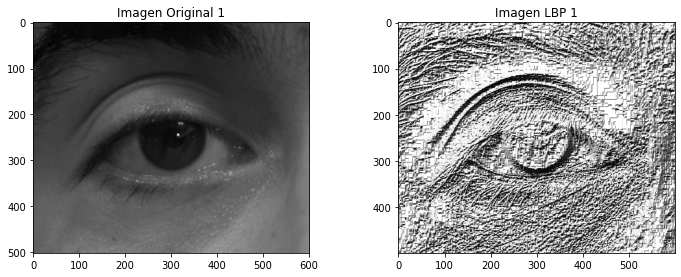

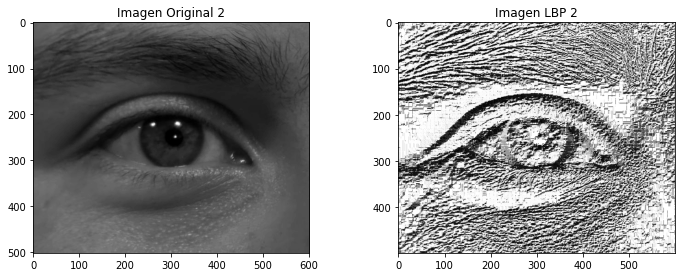

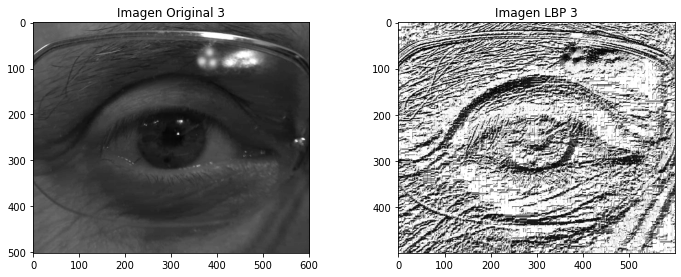

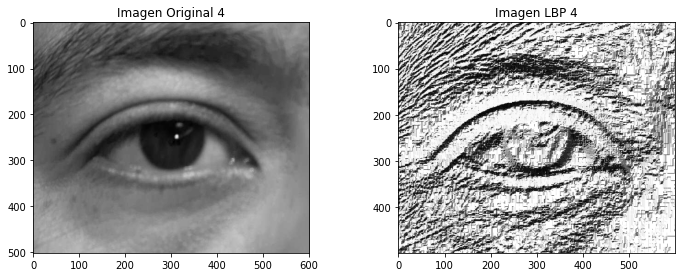

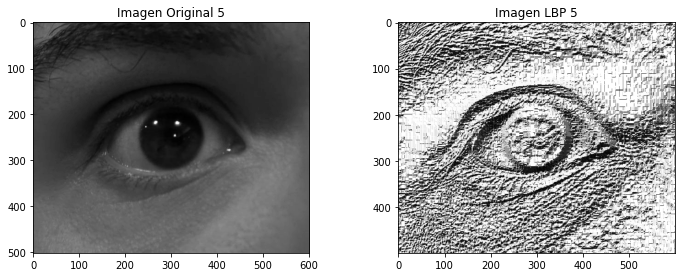

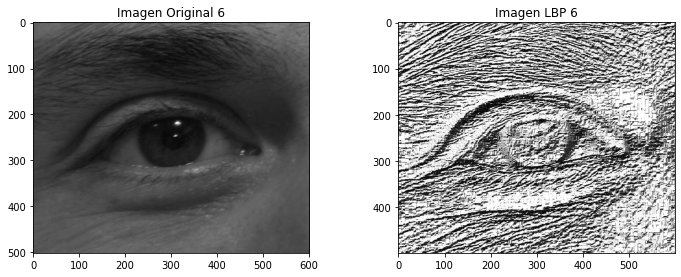

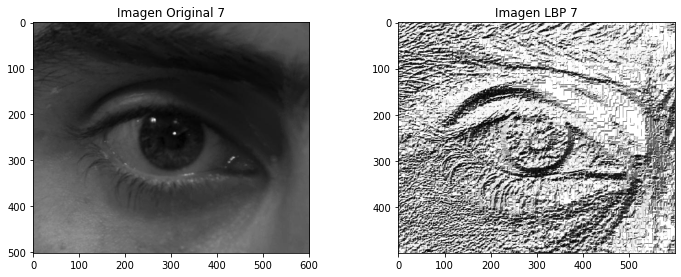

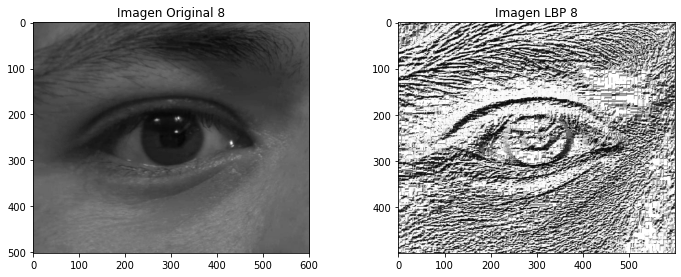

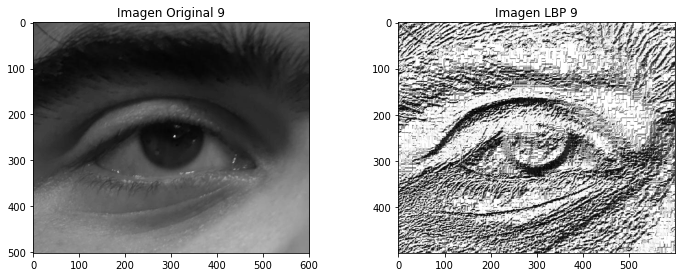

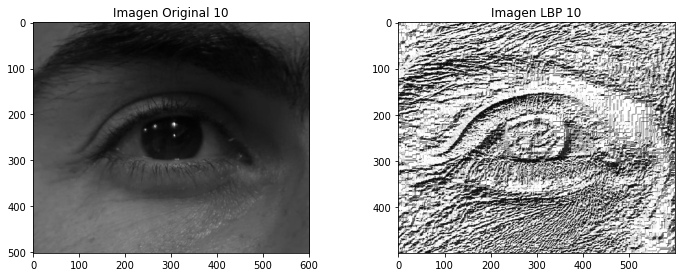

In [6]:
for i in range(10):
    img = cv2.imread("/content/bdd/"+lista_img[i],cv2.IMREAD_GRAYSCALE)
    lbp_img = lbp_image(img)

    plt.figure(figsize=(12, 50))
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(img, cmap='gray')
    plt.title("Imagen Original "+str(i+1))

    plt.subplot(10, 2, 2*(i+1))
    plt.imshow(lbp_img, cmap='gray')
    plt.title("Imagen LBP "+str(i+1))
    plt.show()

    """Lo que primero que se puede notar de las imagenes con LBP, es que estas estan en colores blanco o ligeramente grises claros
    a diferencia de la imagen original que esta en escala de grises. Con respecto a la textura de las imagenes, se puede ver que
    si bien los colores de la imagen LBP son totalmente distintos a los de la original, y la textura es mucho mas "rugosa" se pueden
    seguir observando los mismos relieves y formas en la imagen LBP que tiene la imagen original, incluso detalles pequeños como lo son
    las pestañas y forma del parpado. En todas las imagenes LBP se puede ver que la piel bajo las cejas es practicamente blanca
    mientras que en cuanto al ojo en si se puede notar el relieve del iris y el de la pupila"""

Las principales características que se pueden ver de las imágenes procesadas con LBP son que se detectan y destacan microestructuras tales como bordes, líneas, manchas, áreas planas como lentes y pestañas entre otras.

### Parte #2: Extracción de características

In [7]:
new_rgb_img = cv2.imread("/content/bdd/I1_gal.jpg")
gray_img = cv2.cvtColor(new_rgb_img, cv2.COLOR_BGR2GRAY)
lbp_img = lbp_image(gray_img)

print(gray_img.shape, lbp_img.shape)

(502, 602) (500, 600)


In [14]:
def metodo_1(imagen): # entrada es una imagen de 500 x 600
  m, n = imagen.shape
  vector_hist = []
  for i in range(0,m,100): # iterador de filas dando saltos de 100 (5 iteraciones)
    for j in range(0,n,100): # iterador de columnas dando saltos de 100 (6 iteraciones)
      block = imagen[i:i+100, j:j+100]
      #hist = cv2.calcHist([imagen], [0], None, [59], [0, 256])
      hist, edges = np.histogram(block, bins=59)
      for hist_list in hist:
        vector_hist.append(hist)
  vector_hist = np.array(vector_hist)
  return vector_hist

def metodo_2(imagen):
  m, n = imagen.shape
  vector_hist = []
  for i in range(0,n-50,50): # iterador de filas dando saltos de 50
    for j in range(0,m-100,75): # iterador de columnas dando saltos de 75
      block = imagen[i:i+100, j:j+125]
      hist, edges = np.histogram(block, bins=59)
      for hist_list in hist:
        vector_hist.append(hist)
  vector_hist = np.array(vector_hist)
  return vector_hist

### Parte #3: Implementación medida de distancia

In [10]:
def distance(x,y): # x e y son vectores de igual dimension
    dim = len(x)
    lista_dist = []
    for i in range(dim):
        distancia = np.abs(x[i]-y[i])
        lista_dist.append(distancia)
    return np.sum(np.array(lista_dist))

### Parte #4: Construcción base de datos

In [15]:
path = "/content/bdd/"

def generate_database(directory):
  """
  Se construye una base de datos con la siguiente estructura:
  - bdd[x][0] es la imagen original
  - bdd[x][1] es la imagen lbp
  - bdd[x][2] es es el vector de caracteristicas obtenido con el metodo 1
  - bdd[x][3] es es el vector de caracteristicas obtenido con el metodo 2
  """
  bdd = []
  for img in lista_img:
      image_data = []
      pic = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      lbp = lbp_image(pic)
      chars_1 = metodo_1(lbp)
      chars_2 = metodo_2(lbp)
      image_data.append(pic)
      image_data.append(lbp)
      image_data.append(chars_1)
      image_data.append(chars_2)
      bdd.append(image_data)
  return bdd

database = generate_database(path)

### Parte 5: Prueba de reconocimiento

In [16]:
test_path = "/content/test/"
lista_test_img = []
for i in range(1,11):
    name = f"I{i}_test.jpg".format(i)
    lista_test_img.append(name)
    
comparison_matrix_1 = np.zeros((10,10)) # matriz en la que se guardan los resultados de distancia entre cada imagen de gal y test
comparison_matrix_2 = np.zeros((10,10))

for i in range(10):
  data = database[i]
  vect_1 = data[2]
  vect_2 = data[3]
  for j in range(10):
    test_name = lista_test_img[j]
    test_img = cv2.imread(os.path.join(test_path, test_name), cv2.IMREAD_GRAYSCALE)
    lbp_test_img = lbp_image(test_img)
    char_test_1 = metodo_1(lbp_test_img)
    char_test_2 = metodo_2(lbp_test_img)
    dist_1 = distance(vect_1, char_test_1)
    dist_2 = distance(vect_2, char_test_2)
    comparison_matrix_1[i][j] = dist_1
    comparison_matrix_2[i][j] = dist_2


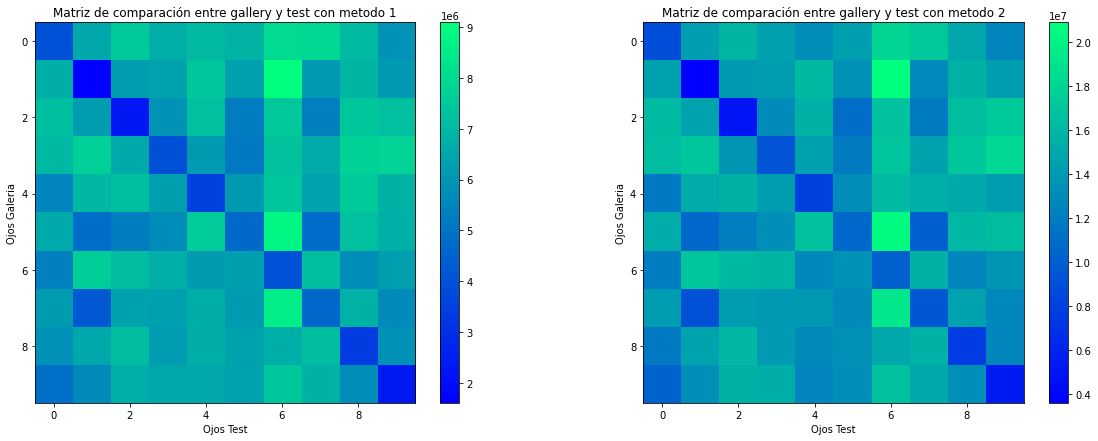

In [17]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.imshow(comparison_matrix_1, cmap='winter')
plt.xlabel('Ojos Test')
plt.ylabel('Ojos Galeria')
plt.title('Matriz de comparación entre gallery y test con metodo 1')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(comparison_matrix_2, cmap='winter')
plt.xlabel('Ojos Test')
plt.ylabel('Ojos Galeria')
plt.title('Matriz de comparación entre gallery y test con metodo 2')
plt.colorbar()

plt.show()

Las matrices de comparación fueron construídas de forma que cada fila corresponde a una imagen de la galería y cada columna a una imagen de test. Los valores que contienen las matrices son las distancias entre los vectores de características obtenidos con los métodos 1 y 2 descritos en la parte 2.

Es importante remarcar que todas las bases de datos y matrices se fueron construyendo en el mismo orden de las imágenes, de modo que se pudieran ver las relaciones entre imágenes correspondientes de forma correcta.

en la figura anterior podemos visualizar gráficamente las distancias entre las imágenes de galería y test. Se puede apreciar que los valores de la diagonal son los más bajos, denotando mayor similitud al realizar la comparación. Por ejemplo, el cuadrado más oscuro es el que se ubica en la posición (9,9), lo que indica que la mayor similitud detectada es entre I10_gal y I10_test.

Estos eran los resultados esperados, ya que todos los pares coincidentes entre galería y test son imagenes de la misma persona con pequeñas alteraciones, de forma que se puede decir que la detección de características con LBP se está realizando de forma correcta.

### Parte 6: Impostor

Se debe implementar un método para detectar un "falso impostor", es decir, a la persona que está en la carpeta ojos_impostor y en la carpeta ojos_gal.

Según lo visto anteriormente, si ninguna persona de la carpeta ojos_impostor se encuentra también en la carpeta ojos_gal, las distancias entre los vectores de características entre estas imágenes deberían tener valores grandes y medianamente homogéneos. 

Es por esto que para detectar a un falso impostor, se deben obtener las distancias de los vectores característicos entre las imágener de ojos_gal y de ojos_impostor. En caso de encontrar una distancia que tenga un valor especialmente bajo en comparación al resto de las distancias, esta corresponderá al falso impostor.

In [19]:
# Se cargan las imagenes de la carpeta impostor:

impostor_path = "/content/impostor/"
lista_impostor_img = []
for i in range(1,4):
    name = f"imp_000{i}.jpg".format(i)
    lista_impostor_img.append(name)

comparison_impostor_1 = np.zeros((10,3)) # matriz en la que se guardan los resultados de distancia entre cada imagen de gal e impostor
comparison_impostor_2 = np.zeros((10,3))

# Creación de matrices de ditancias. Las filas corresponden a las imagenes gal y las columnas a las imagenes de impostor
for i in range(10):
  data = database[i]
  vect_1 = data[2]
  vect_2 = data[3]
  for j in range(3):
    impostor_name = lista_impostor_img[j]
    impostor_image = cv2.imread(os.path.join(impostor_path, impostor_name), cv2.IMREAD_GRAYSCALE)
    lbp_impostor_img = lbp_image(impostor_image)
    char_impostor_1 = metodo_1(lbp_impostor_img)
    char_impostor_2 = metodo_2(lbp_impostor_img)
    dist_impostor_1 = distance(vect_1, char_impostor_1)
    dist_impostor_2 = distance(vect_2, char_impostor_2)
    comparison_impostor_1[i][j] = dist_impostor_1
    comparison_impostor_2[i][j] = dist_impostor_2

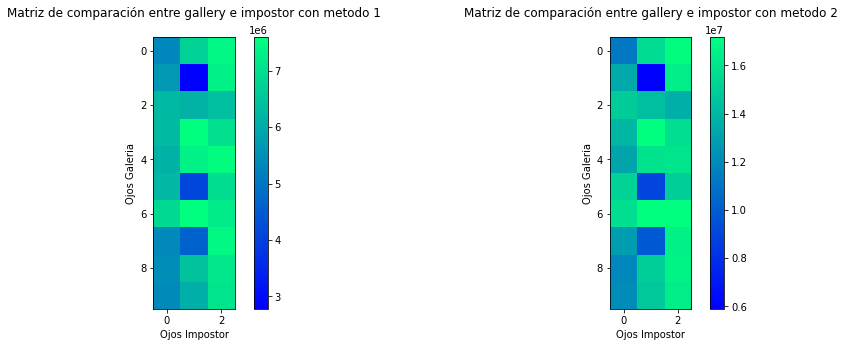

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(comparison_impostor_1, cmap='winter')
plt.xlabel('Ojos Impostor')
plt.ylabel('Ojos Galeria')
plt.title('Matriz de comparación entre gallery e impostor con metodo 1', pad=20)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(comparison_impostor_2, cmap='winter')
plt.xlabel('Ojos Impostor')
plt.ylabel('Ojos Galeria')
plt.title('Matriz de comparación entre gallery e impostor con metodo 2', pad=20)
plt.colorbar()

plt.show()

El gráfico anterior pone en evidencia que el falso impostor es imp_0002 porque se observa que presenta distancias notoriamente más pequeñas.

La siguiente figura muestra la foto del falso impostor de la galería y de la carpeta ojos_impostor:

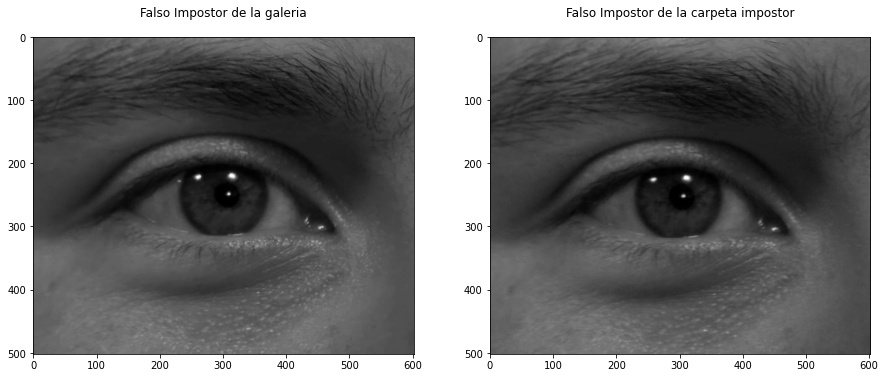

In [21]:
falso_gal_path = '/content/bdd/I2_gal.jpg'
falso_gal_img = cv2.imread(falso_gal_path, cv2.IMREAD_GRAYSCALE)

falso_imp_path = '/content/impostor/imp_0002.jpg'
falso_imp_img = cv2.imread(falso_imp_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 20))
plt.subplot(1,2,1)
plt.imshow(falso_gal_img, cmap='gray')
plt.title('Falso Impostor de la galeria', pad=20)

plt.subplot(1,2,2)
plt.imshow(falso_imp_img, cmap='gray')
plt.title('Falso Impostor de la carpeta impostor', pad=20)

plt.show()